In [1]:
import torch
import numpy as np

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [3]:
def model(t_u, w, b):
  return w*t_u+b    

In [4]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p-t_c)**2
  return squared_diffs.mean()

In [5]:
params = torch.tensor([1.0,0.0], requires_grad = True)

In [6]:
loss = loss_fn(model(t_u,*params), t_c)
loss.backward()

In [7]:
params.grad

tensor([4517.2969,   82.6000])

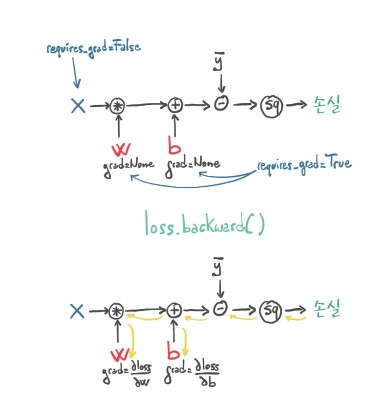

In [8]:
from IPython import display
display.Image('C:/Users/user/Desktop/HH/img/70.jpg', width = 700, height = 1000)

In [9]:
if params.grad is not None:
  params.grad.zero_()

In [10]:
params.grad

tensor([0., 0.])

In [11]:
# 자동미분을 적용한 훈련 코드
n_epochs = 10
learning_rate = 0.01
def training_loop(n_epoch, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epoch+1):
    if params.grad is not None:  # backward 호출전에 적용
      params.grad.zero_()
    
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate*params.grad # 파라메터 조정    
    if epoch % 500 == 0:
      print(f"epoch:{epoch} loss : {float(loss)}")
  return params

In [12]:
training_loop(n_epoch=5000,learning_rate=0.01,params = torch.tensor([1.0,0.0], requires_grad=True),
    t_u=t_un, t_c=t_c)  # 마지막 t_u 를 정규화 하지 않으면 큰 값이 나와서 nan이 된다.

epoch:500 loss : 7.860115051269531
epoch:1000 loss : 3.828537940979004
epoch:1500 loss : 3.092191219329834
epoch:2000 loss : 2.957697868347168
epoch:2500 loss : 2.933133840560913
epoch:3000 loss : 2.9286484718322754
epoch:3500 loss : 2.9278297424316406
epoch:4000 loss : 2.9276793003082275
epoch:4500 loss : 2.927651882171631
epoch:5000 loss : 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

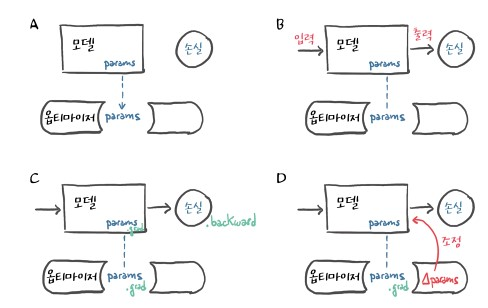

In [13]:
display.Image('C:/Users/user/Desktop/HH/img/71.jpg', width = 700, height = 1000)

In [14]:
# 옵티마이저는 zero_grad()와 step 이라는 두가지 메소드를 제공
# zero_grad는 옵티마이저 생성자에 전달된 파라미터의 모든 grad 속성을 0으로 만든다
# step은 옵티마이저 별로 구현된 최적화 전략에 따라서 파라미터 값을 조정

In [15]:
# 경사하강 옵티마이저
import torch.optim as optim

params = torch.tensor([1.0,0.0], requires_grad = True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [16]:
t_p = model(t_u, *params)
loss = loss_fn(t_p,t_c)
loss.backward()

optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [17]:
params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
optimzer = optim.SGD([params], lr = learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p,t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1., 0.], requires_grad=True)

In [18]:
# 자동미분과 Opimizer을 적용한 훈련 코드
def training_loop(n_epoch, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epoch + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f"epoch:{epoch} loss:{float(loss)}")
  return params

In [19]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epoch=5000, optimizer=optimizer, params=params, t_u = t_un, t_c= t_c)

epoch:500 loss:7.860115051269531
epoch:1000 loss:3.828537940979004
epoch:1500 loss:3.092191219329834
epoch:2000 loss:2.957697868347168
epoch:2500 loss:2.933133840560913
epoch:3000 loss:2.9286484718322754
epoch:3500 loss:2.9278297424316406
epoch:4000 loss:2.9276793003082275
epoch:4500 loss:2.927651882171631
epoch:5000 loss:2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [20]:
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epoch=5000, optimizer=optimizer, params=params, t_u = t_un, t_c= t_c)

epoch:500 loss:2.927645206451416
epoch:1000 loss:2.927645206451416
epoch:1500 loss:2.927645206451416
epoch:2000 loss:2.927645683288574
epoch:2500 loss:2.927644968032837
epoch:3000 loss:2.927645206451416
epoch:3500 loss:2.9276459217071533
epoch:4000 loss:2.9276702404022217
epoch:4500 loss:2.9276463985443115
epoch:5000 loss:2.9276459217071533


tensor([  5.3677, -17.3048], requires_grad=True)

In [21]:
# randperm함수
n_samples = t_u.shape[0]
n_val = int(0.2*n_samples)
shuffled_indicies =  torch.randperm(n_samples)

train_indicies = shuffled_indicies[:-n_val]
val_indicies = shuffled_indicies[-n_val:]

train_indicies, val_indicies

(tensor([10,  7,  2,  6,  1,  4,  9,  5,  0]), tensor([8, 3]))

In [22]:
# 훈련셋, 검증셋
train_t_u = t_u[train_indicies]
train_t_c = t_c[train_indicies]

val_t_u = t_u[val_indicies]
val_t_c = t_c[val_indicies]

train_t_un = 0.1*train_t_u
val_t_un = 0.1*val_t_u

In [23]:
# 자동미분 옵티마이저를 적용한 훈련 코드
# 과적합 여부를 판단하기 위해서 검증셋에 대한 손실 값을 계산
def training_loop(n_epoch, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epoch+1):        
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p,train_t_c)

    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p,val_t_c)

    optimizer.zero_grad()    
    train_loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
      print(f"epoch:{epoch} train loss : {float(train_loss)} validation loss : {float(val_loss)}")
  return params

In [24]:
params = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epoch=8000, optimizer=optimizer, params=params
              , train_t_u=train_t_u, val_t_u=val_t_u, train_t_c=train_t_c, val_t_c=val_t_c)

epoch:500 train loss : 22.12449073791504 validation loss : 65.34797668457031
epoch:1000 train loss : 21.816652297973633 validation loss : 64.58634185791016
epoch:1500 train loss : 21.513629913330078 validation loss : 63.8353385925293
epoch:2000 train loss : 21.215341567993164 validation loss : 63.094749450683594
epoch:2500 train loss : 20.921722412109375 validation loss : 62.364498138427734
epoch:3000 train loss : 20.6326904296875 validation loss : 61.644386291503906
epoch:3500 train loss : 20.348176956176758 validation loss : 60.934261322021484
epoch:4000 train loss : 20.068111419677734 validation loss : 60.2340087890625
epoch:4500 train loss : 19.79242706298828 validation loss : 59.54344940185547
epoch:5000 train loss : 19.52105140686035 validation loss : 58.86247253417969
epoch:5500 train loss : 19.25391960144043 validation loss : 58.19091033935547
epoch:6000 train loss : 18.9909610748291 validation loss : 57.52864074707031
epoch:6500 train loss : 18.732114791870117 validation loss 

tensor([ 0.2470, -1.9017], requires_grad=True)